## Tinanic

In [1]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### 读取数据并打印基本信息

In [2]:
data = pd.read_csv(os.path.join("../Data/Titanic", "train.csv"), sep=",")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


#### 预测目标的基本分布

In [7]:
data['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

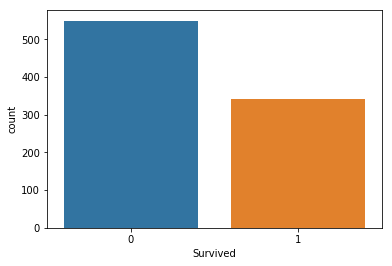

In [8]:
sns.countplot(data['Survived'])

#### 舱位与预测目标的关系

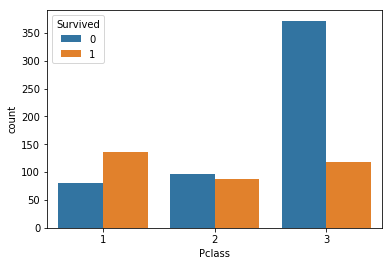

In [10]:
sns.countplot(data['Pclass'], hue=data['Survived'])

#### 名字的信息

In [11]:
data['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

#### 对名字属性进行变换  
- 取名字的title

In [12]:
data['Name_title'] = data['Name'].apply(lambda x: x.split(',')[1] if len(x.split(',')) > 1 else x.split(',')[0]).apply(lambda x: x.split()[0])

In [13]:
data['Name_title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Col.           2
Major.         2
Don.           1
Mme.           1
the            1
Ms.            1
Capt.          1
Jonkheer.      1
Sir.           1
Lady.          1
Name: Name_title, dtype: int64

#### 名字的title与存活与否的关系

In [14]:
data['Survived'].groupby(data['Name_title']).mean()

Name_title
Capt.        0.000000
Col.         0.500000
Don.         0.000000
Dr.          0.428571
Jonkheer.    0.000000
Lady.        1.000000
Major.       0.500000
Master.      0.575000
Miss.        0.697802
Mlle.        1.000000
Mme.         1.000000
Mr.          0.156673
Mrs.         0.792000
Ms.          1.000000
Rev.         0.000000
Sir.         1.000000
the          1.000000
Name: Survived, dtype: float64

#### 取名字的长度

In [15]:
data['Name_len'] = data['Name'].apply(lambda x: len(x))

#### 名字长度与存活与否的关系

In [17]:
data['Survived'].groupby(pd.qcut(data['Name_len'], 5)).mean()

Name_len
(11.999, 19.0]    0.220588
(19.0, 23.0]      0.301282
(23.0, 27.0]      0.319797
(27.0, 32.0]      0.442424
(32.0, 82.0]      0.674556
Name: Survived, dtype: float64

#### 性别的分布与最后幸存的关系

In [18]:
data['Sex'].value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [19]:
data['Survived'].groupby(data['Sex']).mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

#### 年龄与幸存的关系  
- 缺失数据的处理  
  1 实值： 中位数或者平均数去补  
  2 类别： major class去补

In [20]:
data['Survived'].groupby(pd.qcut(data['Age'], 5)).mean()

Age
(0.419, 19.0]    0.481707
(19.0, 25.0]     0.328467
(25.0, 31.8]     0.393701
(31.8, 41.0]     0.437500
(41.0, 80.0]     0.373239
Name: Survived, dtype: float64

#### 登船的地点与幸存的关系

In [21]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [22]:
data['Survived'].groupby(data['Embarked']).mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

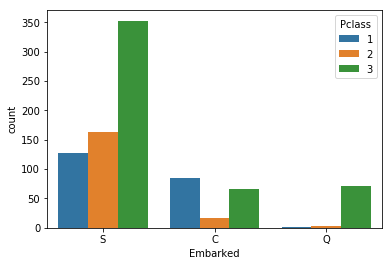

In [23]:
sns.countplot(data['Embarked'], hue=data['Pclass'])

### 新来了一个小鲜肉，基本信息如下  


#### Feature Transform

In [ ]:
def name(data):
    data['name_len'] = data['name'].apply(lambda x: len(x))
    data['name_title'] = data['name'].apply(lambda x: x.split(',')[1] if len(x.split(',')) > 1 else x.split(',')[0]).apply(lambda x: x.split()[0])
    del data['name']
    return data

def age(data):
    data['age_flag'] = data['age'].apply(lambda x: 1 if pd.isnull(x) else 0)
    grouped_age = data.groupby(['name_title', 'pclass'])['age']
    data['age'] = grouped_age.transform(lambda x: x.fillna(data['age'].mean()) if pd.isnull(x.mean()) else x.fillna(x.mean()))
    return data

def embark(data):
    data['embarked'] = data['embarked'].fillna('Southampton')
    return data


def dummies(data, columns=['pclass','name_title','embarked', 'sex']):
    for col in columns:
        data[col] = data[col].apply(lambda x: str(x))
        new_cols = [col + '_' + i for i in data[col].unique()]
        data = pd.concat([data, pd.get_dummies(data[col], prefix=col)[new_cols]], axis=1)
        del data[col]
    return data

#### 预处理输入数据  
- 去掉不需要的特征  
- 对某些特征进行变换

In [ ]:
drop_columns = ['row.names', 'home.dest', 'room', 'ticket', 'boat'] #+ ['ticket_len', 'ticket_title']
data = data.drop(drop_columns, axis=1)
data.head()

In [ ]:
data = name(data)
data = age(data)
data = embark(data)
data = dummies(data)
data.head()

####  调用决策树模型并预测结果

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import tree
trainX, testX, trainY, testY = train_test_split(data.iloc[:,1:], data.iloc[:,0], test_size=0.2, random_state=33)

model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)
model.fit(trainX, trainY)

In [ ]:
from sklearn import metrics
def measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confussion_matrix=True):
    y_pred = clf.predict(X)
    if show_accuracy:
        print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n")
    
    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y, y_pred), "\n")
    
    if show_confussion_matrix:
        print("Confusion matrix")
        print(metrics.confusion_matrix(y, y_pred), "\n")

In [ ]:
measure_performance(testX, testY, model)

#### 不做特征分析直接调用决策树模型

In [ ]:
sub_columns = ['age', 'sex_male','sex_female']
sub_trainX = trainX[sub_columns]
sub_testX = testX[sub_columns]
sub_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)
sub_model.fit(sub_trainX, trainY)

In [ ]:
measure_performance(sub_testX, testY, sub_model)

#### 可视化决策树

In [ ]:
import graphviz
dot_data = tree.export_graphviz(model, out_file=None, feature_names=trainX.columns) 
graph = graphviz.Source(dot_data) 
#graph.render("titanic") 
#graph.view()

#### display graph inline

In [ ]:
graph

#### 展示特征的重要性

In [ ]:
pd.concat([pd.DataFrame(trainX.iloc[:,1:].columns, columns=['variable']),
         pd.DataFrame(model.feature_importances_, columns=['importance'])],
         axis=1).sort_values(by='importance', ascending=False)[:20]